# Merge Results

## Setup

In [28]:
%matplotlib inline
import numpy as np
import glob
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from mintpy.utils import readfile, writefile, utils as ut
from mintpy.objects import ifgramStack
from mintpy import view
from skimage.morphology import remove_small_objects
from itertools import product

In [16]:
cd ~/data

/home/fw/data


In [25]:
wd = Path('./merged')
if not wd.exists():
    wd.mkdir(exist_ok=False)

In [35]:
data_dirs = [Path('./T60HUB'), Path('./T60GUA')]
files = ['velocityAz.h5','velocityRg.h5','velocityMg.h5']

## Merge

In [39]:
for f in files:
    in_f = ' '.join([str(d/f) for d in data_dirs])
    out_f = str(wd/f)
    !image_stitch.py {in_f} -o {out_f}

files to be stitched:
	T60HUB/velocityAz.h5
	T60GUA/velocityAz.h5
read data from file: T60HUB/velocityAz.h5
--------------------------------------------------
read data from file: T60GUA/velocityAz.h5
stitching ...
grab corners of input matrices
calculate corners of output matrix
estimate difference in the overlaping area
average offset between two matrices in the common area: 0.7676505796003843
offset all pixel values in the 2nd matrix by 0.7676505796003843 
create output metadata and matrix in shape of (2316, 2745)
plot stitching & shifting result ...
save figure to file: merged/velocityAz__12.png
showing ...
Figure(1500x800)
--------------------------------------------------
create HDF5 file: merged/velocityAz.h5 with w mode
create dataset /velocity of float32    in size of (2316, 2745)         with compression=None
finished writing to merged/velocityAz.h5
files to be stitched:
	T60HUB/velocityRg.h5
	T60GUA/velocityRg.h5
read data from file: T60HUB/velocityRg.h5
--------------------

In [40]:
cd merged

/home/fw/data/merged


In [43]:
ls

velocityAz.h5       velocityMg.h5       velocityRg.h5
velocityAz__12.png  velocityMg__12.png  velocityRg__12.png


view.py velocityMg.h5 --noverbose --vlim 0 500


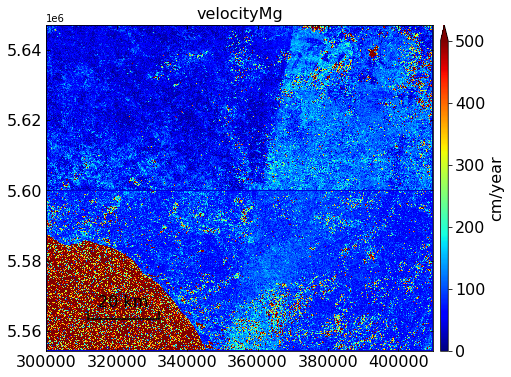

In [47]:
view.main('velocityMg.h5 --noverbose --vlim 0 500'.split())

## Mask

In [ ]:
!generate_mask.py velocityMg.h5 --vstd --vstd-num 2 -o mask_std.h5

In [ ]:
# !generate_mask.py mask_std.h5 -p 1 -o mask_std2_min10.h5

In [ ]:
data, atr = readfile.read('mask_std.h5')
mask = remove_small_objects(data,10, connectivity=1)
writefile.write({'mask':mask},out_file='mask_std_min.h5',ref_file='mask_std.h5')

In [ ]:
view.main('mask_std_min.h5 --noverbose'.split())

In [ ]:
!mask.py velocityMg.h5 -m mask_std_min.h5 -o velocityMgMask.h5

In [ ]:
view.main('velocityMgMask.h5 --vlim 0 500 --noverbose'.split())

## Transfer Results

In [ ]:
out_dir =  '/mnt/i/sentinel2/yearly'
files = ['velocityAz.h5','velocityRg.h5','velocityMg.h5','velocityMgMask.h5']

for f in files:
    out_f = os.path.join(out_dir,f'{f.split(".")[0]}.tif')
#     print(out_f)
    !save_gdal.py $f -d velocity -o $out_f